In [67]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import Progbar

In [3]:
#Loading pretrainded GAN generator

gen = tf.saved_model.load("saved_models\WGAN_CelebA_model\saved_models_2.0")

In [4]:
#Loading pretrained CelebA attributes classifier

classifier = tf.saved_model.load("saved_models\celebA_classifier_weights\models\My_celebA_attr_Classifier_model")

In [90]:
batch_size = 8
z_dim = 100

In [91]:
def get_noise(batch_size , z_dim):
    
    
    return tf.random.normal([batch_size,z_dim])

In [100]:
noise = get_noise(batch_size, z_dim)
noise.shape

TensorShape([8, 100])

In [92]:
def update_noise(noise, weight , grad):
    
    
    noise = noise + (grad * weight)
    return noise

In [102]:
t_image = gen(noise)
t_image.shape

TensorShape([8, 224, 224, 3])

In [103]:
cls = classifier(t_image)
cls.shape

TensorShape([8, 40])

In [114]:
    
feature_names = ["5oClockShadow", "ArchedEyebrows", "Attractive", "BagsUnderEyes", "Bald", "Bangs",
    "BigLips", "BigNose", "BlackHair", "BlondHair", "Blurry", "BrownHair", "BushyEyebrows", "Chubby",
    "DoubleChin", "Eyeglasses", "Goatee", "GrayHair", "HeavyMakeup", "HighCheekbones", "Male", 
    "MouthSlightlyOpen", "Mustache", "NarrowEyes", "NoBeard", "OvalFace", "PaleSkin", "PointyNose", 
    "RecedingHairline", "RosyCheeks", "Sideburn", "Smiling", "StraightHair", "WavyHair", "WearingEarrings", 
    "WearingHat", "WearingLipstick", "WearingNecklace", "WearingNecktie", "Young"]
    
feature_name_index = feature_names.index("WearingLipstick")
  
def noise_grad(noise):
    with tf.GradientTape() as noise_tape:
        noise_tape.watch(noise)
        fake = gen(noise)
        classifier_score = tf.reduce_mean(classifier(fake)[:,feature_name_index])
    
    noise_grad = noise_tape.gradient(classifier_score,noise)
    
    return noise_grad , fake
    
        
        
        
        

In [115]:
def train_step(epochs):
    fake_image = []
    noise = get_noise(batch_size , z_dim )
    p_bar = Progbar(epochs)
    for epoch in range(epochs):
        grad , fake = noise_grad(noise)
        fake_image.append(fake)
        noise = update_noise(noise , weight  = 1/epochs , grad = grad)
        p_bar.add(1)
    return fake_image

In [116]:
gen_images = train_step(10)

10/10 [==============================] - 106s 11s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

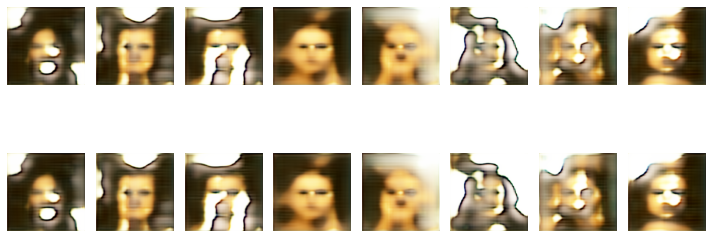

In [127]:
fig , ax = plt.subplots(2,8 , figsize = (10,8))

for j in range(2):
  for i in range(8):
    plt.sca(ax[j][i])
    if j == 0:
      plt.imshow(gen_images[0][i].numpy())
    else:
      plt.imshow(gen_images[9][i].numpy())
    plt.axis("off")
    plt.tight_layout()